In [1]:
# Niko Sarcevic
# October 2022
# https://github.com/nikosarcevic

In [2]:
from IPython.display import IFrame, display, HTML, Image
display(HTML('<style>.container { width:100% !important; } </style>'))

# Introduction

*This is a sample notebook, created for the purposes of showing "good code practices" for a level appropriate for a physics undergraduate.
The experiment used as a showcase is a nucelar physics experiment with data acquired by the author.*

## A short bit on errors

A measurement error (experimental or observation error) is the difference between an *observed value* and the *true value* of something (that we are measuring).

There are two main types of measurement error:

- **random error** is a chance difference between the observed and true values of something (*e.g.* misreading the value on a ruler).
- **systematic error** is a consistent difference between the observed and true values of stuff we are measuring. This can be due to bad calibration, poor understanding of the nature of the problem (*e.g.* physics), etc.

Understanding the errors and their nature can mitigate their impact.
We want accurate and precise measurements.

Accuracy and precision are two measures of observational error. 
- **accuracy** is how close a given set of measurements (observations or readings) are to their true value
- **precision** is how close the measurements are to each other

Accuracy is the proximity of measurement results to the accepted value; precision is the degree to which repeated (or reproducible) measurements under unchanged conditions show the same results.

*this paragraph was adopted (and modified) from Wikipedia https://en.wikipedia.org/wiki/Accuracy_and_precision*

In [3]:
IFrame("pics/precision-vs-accuracy.png", width=500, height=300)
#https://danielmiessler.com/blog/difference-precision-accuracy/

In [4]:
IFrame("pics/Accuracy_and_precision.png", width=500, height=300)
#https://en.wikipedia.org/wiki/Accuracy_and_precision

## A little bit of physics

Let us have a good example from nuclear physics: radioactive decay. 

The decay rate of a (radio)nuclide is called *activity*:
$
\begin{align}
A = \lambda N
\end{align}
$
where
- $\lambda$ is the decay constant (probability of each atom undergoing radioactive decay)
- $N$ is the total number of radioactive atoms
Activity has units of disintegrations per second (decays per second).

Now, you see, we have a bit of a complex problem because we talked about errors, accuracy and precision and here we are dealing with something stochastic (statistical) in nature -- the activity of the sample that we want to measure will decay with a certain probability! So, in order to tackle this problem, we need to understand the nature and physics behind it.

What do we want to answer?
Which activity (intensity) will be the most probably and with which error will it be measured?

Luckily, we have a a help from our good old friend: the statistics (the stats).


## The stats

In reality, it is not always straightforward or possible to obtain a distribution function of a random variable $X$. The next best thing is to charaterise the distribution with the distribution parameters. 

The basic distribution parameters are: **the expectation value $\mu$** and **the variance (dispersion) $\sigma^2$**.

The expectation value $\mu$ of a random variable $X$ can take all the values $x_i$ with a probability $p_i, (i = 1, 2, 3, ...)$ and is defined as:
$
\begin{align}
\mu = \sum \limits _{i=1} ^\infty x_i p_i
\end{align}
$

The variance tell us how far a set of numbers is spread out from their average value (a mesure of dispersion), or written mathematically:
$
\begin{align}
\sigma^2 = \sum \limits _{i=1} ^\infty (x_i - \mu)^2 p_i
\end{align}
$

The square root of variance is the **standard deviation** $\sigma$.

If we are dealing with a small number (sample) of random variable, then the distribution of the discrete random variable will be described with a Poisson distribution. For example, the number of chewing gums on a single tile is approximately Poisson distributed.
The mathematical form of the Poisson distribution is:
$
\begin{align}
P (N) = \frac{\overline N ^N}{N !} e^{- \overline N}
\end{align}
$
where $N$ is a random discrete variable and $\overline N$ is its mean.

Both the expectation value and the variance are the equal to the mean in the case of the Poisson distribution:

$
\begin{align}
\mu = \overline N \; \; \mathrm{and} \; \; \sigma^2 = \overline N
\end{align}
$
The standard deviation is then:

$
\begin{align}
\sigma = \pm \sqrt{\overline N}
\end{align}
$

When the expecation value is $\overline N \gt 20$, Poisson distribution tends toward a Gaussian distribution:

$
\begin{align}
P (N) = \frac{1}{\sqrt{2 \pi \overline N}} e^{- \frac{(N - \overline N)^2}{2 N}}
\end{align}
$


Now, going back to errors, it is handy to mention a **relative error $\delta$**. Relative error is defined as:

$
\begin{align}
\delta = \frac{\sigma}{\overline N} = \frac{1}{\sqrt{\overline N}}
\end{align}
$

This is pretty useful as by using this expression, we can determine the count $N$ necessary to have measurements with desired precision. For example, if we want the measurement error to be 1%, then $\delta = 0.01$ and the count $N$ should be:

$
\begin{align}
N = \frac{1}{\delta^2} = \frac{1}{0.01^2} = 10^4
\end{align}
$

## Experimental method

Use a GM counter and appropriate electronics. Alternatively, use a scintillation detector.
Do a series of measurements up to 400. Choose a time interval so that the count corresponds to $\overline N \approx 7 - 8$ impulses.

# Data processing

First, we import the necessary libraries. It is always a good idea to nest them together rather than have them all over the place:

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import poisson_functions as pf

We first load our dataset. I personally prefer pandas for this. You can use numpy if you like.

In [6]:
# load the data
data = pd.read_csv("Statistical Fluctuations Data.csv")

# check the data (remove # in the next line to check the data)
#data

# set the variables
counts = data["counts"] # N, counts
abs_freq = data["absolute frequency"] # absolute frequency

# calculate the sum of absolute frequencies
abs_freq_sum = np.sum(abs_freq)
# check if the sum is correct (remove # in the next line to check the sum)
#print(f"my absolute frequency sum is: {abs_freq_sum}")


Now we need to get some stats.
The basics are: the expectation value $\mu$ and the standard deviation (std) $\sigma$.

As mentioned above, in the case of the Poisson distribution, the expectation value is equal to the mean and is caclulated as:

$
\begin{align}
\mu = \overline N = \frac{1}{n} \sum \limits _i ^ N N_i = \frac{\sum \limits _i ^ N N_i f_i}{\sum \limits _i ^ N f_i}
\end{align}
$

while the standard deviation is:

$
\begin{align}
\sigma = \pm \sqrt{\overline N}
\end{align}
$


In [7]:
# get some stats here

# calculate the mean
mean = np.sum(counts * abs_freq) / np.sum(abs_freq)
# check the mean (remove # in the next line to check)
print(f"my mean is: {mean:.1f}")
    
# calculate the standard deviation (std)
std = np.sqrt(mean)
# check the std (remove # in the next line to check)
print(f"my std is: \u00B1 {std:.1f}")

# calculate the variance
variance = std**2
# check the std (remove # in the next line to check)
print(f"my variance is: {variance:.1f}")

my mean is: 12.6
my std is: ± 3.6
my variance is: 12.6


In [ ]:
# test run my function to see if it work
#poiss_test = pf.get_poisson_probs(mean, counts) # just named it poiss

# do some checks (uncomment to check) 
#print(f"these are my poisson probabilities: {poiss_test}")
#print("--------------------------")
#print(f"the length of my poisson test list is: {len(poiss_test)}")

In [8]:
# compare the sum of relative frequencies and the sum of the probabilities from the poisson distribution.
# they should be close to unity

# here we obtain the relative frequency
rel_freq = pf.get_relative_frequency(abs_freq)
# here we obtain the sum of the relative frequencies
rel_freq_sum = np.sum(rel_freq)

# here we obtain the poisson probabilities
poisson_probs = pf.get_poisson_probs(mean, counts)
# here we obtain the sum of the probabilities
poisson_probs_sum = np.sum(poisson_probs, axis=0)

# now we compare the two:
print(f"the sum of relative frequencies is: {rel_freq_sum}")
print(f"the sum of poissonian probabilities is: {poisson_probs_sum}")


the sum of relative frequencies is: 1.0000000000000002
the sum of poissonian probabilities is: 0.993146702621363


## Plot

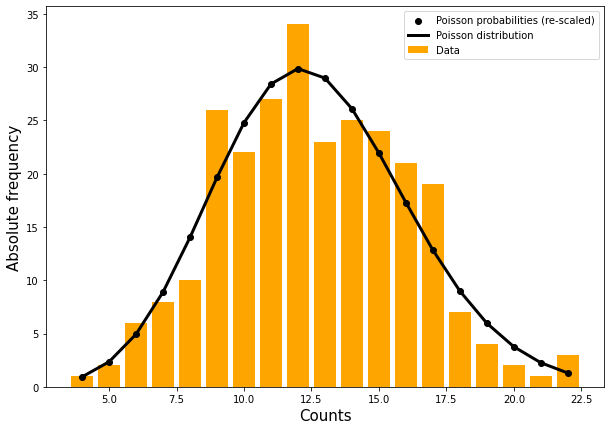

In [9]:
# set the figure props
fig = plt.figure(figsize=(10,7))

# plot the measurements as a histogram
plt.bar(counts, abs_freq, color="orange", label="Data")

# rescale the poisson probabilities
poisson_probs_rescaled = [] # make an empty list
for i in poisson_probs:
    poisson_probs_rescaled.append(i * np.sum(abs_freq)) # append to list

# plot the rescaled poisson probabilities
plt.scatter(counts, poisson_probs_rescaled, c="k", label="Poisson probabilities (re-scaled)")

# plot the poisson distribution
plt.plot(counts, poisson_probs_rescaled, c="k", lw=3, label="Poisson distribution")

# set the plot props: legend, axes labels
plt.legend()
plt.xlabel("Counts", fontsize=15)
plt.ylabel("Absolute frequency", fontsize=15)

# save the figure
plt.savefig("PoissonFit.pdf")

From the plot, it can be seen that the measured counts for the radioactive decay can be described with Poisson probabilities. In the case of source used, the obtained probabilities correspond to the Poisson distribution with distribution parameters:

In [10]:
print(f"expectation value: {mean:.1f}")
print(f"standard deviation: {std:.1f}")
print(f"variance: {variance:.1f}")

expectation value: 12.6
standard deviation: 3.6
variance: 12.6
